In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import csv

In [28]:
X_train = []
Y_train = []

X_train = np.loadtxt('./q1/linearX.csv')
X_train = X_train.reshape(len(X_train),1)
Y_train = np.loadtxt('./q1/linearY.csv')
Y_train = Y_train.reshape(len(Y_train),1)


X_copy = X_train
X_train = (X_train - np.mean(X_train)) / (np.max(X_train) - np.mean(X_train))   #Normalisation step

M = len(X_train)

# print(X_train)
# print(Y_train)

In [29]:
def cost_func(X,Y,Theta):
    H = np.dot(X,Theta)
    Z = np.subtract(H,Y)
    J = (1/2) * (1/M) * (np.dot(Z.T,Z))
    return (J[0][0])


In [30]:
def gradient_desc(X,Y,Theta,alpha):
    curr_J = cost_func(X,Y,Theta)
    count = 0
    
    while(count<1000):  #stopping condition is number of iterations
        H = np.dot(X,Theta)
#         print("HHHHHHHHHHHHHHHHHHH")
#         print(H)
        Z = np.subtract(H,Y)
#         print("ZZZZZZZZZZZZZZZZZZ")
#         print(Z)
        delta = alpha * np.dot(X.T,Z)  #gradient value times learning rate
#         print(Theta)
#         Theta[0][0] = float(Theta[0][0]) - delta
#         Theta[1][0] = Theta[1][0] - delta    #Update values
        
        Theta = Theta - delta
        prev_J = curr_J
        curr_J = cost_func(X,Y,Theta)
#         print(curr_J)
        count+=1
        
    return curr_J,Theta
        
        

In [31]:
#Part A answer-goes to 1.1948150847159106e-06

theta = np.reshape(np.zeros(2), (2, 1))
X_train = np.reshape(X_train, (M,1))
Y_train = np.reshape(Y_train, (M,1))

# print(X_train)
X = np.hstack((np.reshape(np.ones(M), (M, 1)), X_train))  #input ready to be fed into Stack
# print(X)
J,Theta_Dash = gradient_desc(X,Y_train,theta,0.001)
# print(J)
# print(Theta_Dash)

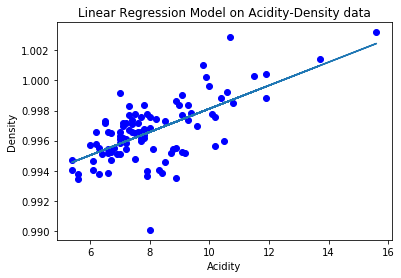

In [32]:
#Part B - plotting the data and the function
plt.figure(1)
plt.plot(X_copy, Y_train, 'bo')
plt.title('Linear Regression Model on Acidity-Density data')
plt.xlabel('Acidity')
plt.ylabel('Density')
plt.plot(X_copy, np.dot(X, Theta_Dash))
plt.show()
# plt.imshow()
plt.close()

In [36]:
#Part C- Drawing of a mesh

x = np.zeros((len(theta[0]),1))
y = np.zeros((len(theta[0]),1))
z = np.zeros((len(theta[0]),1))

x, y = np.meshgrid(x, y)
for i in range(0, len(theta[0])):
    x[i][0] = 0.996 - (i-50)
    y[i][0] = 0.0013 - (i-50)
    z[i][0] = cost_func(X,Y_train,theta)
    print(z[i][0])

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
plt.close()

0.49662790471449997


ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>